In [97]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
from scipy import stats as st
from matplotlib.pyplot import cm



In [98]:
data = uproot.open("../GeantOutput/FASERvSi-reformatted.1000.HITS.root:Hits")

In [99]:
events = data.arrays(data.keys(), library='ak', cut="isCC == 1")

In [119]:
max_hits_in_layer_e = []
max_hits_in_layer_mu = []
max_hits_in_layer_ta = []
for event in events:
    
    if 11 in event['pdgc']:
        continue
    
    h_layers, _ = np.histogram(event['layer'], len(set(event['layer'])))
    
    if abs(event['nu_pdgc']) == 12:
        max_hits_in_layer_e.append(max(h_layers))
        
    if abs(event['nu_pdgc']) == 14:
        max_hits_in_layer_mu.append(max(h_layers))
        
    if abs(event['nu_pdgc']) == 16:
        max_hits_in_layer_ta.append(max(h_layers))

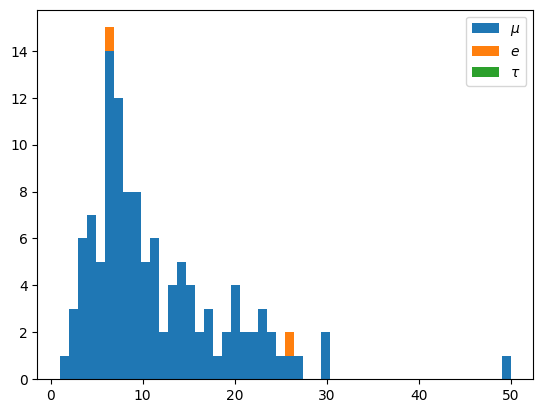

In [120]:
fig, ax = plt.subplots()
ax.hist([max_hits_in_layer_mu, max_hits_in_layer_e, max_hits_in_layer_ta], 50, label=[r"$\mu$", r"$e$", r"$\tau$"], stacked=True);
ax.legend();

In [102]:
max_hits_in_module = []
histograms = []
edges_x = []
edges_y = []

for event in tqdm(events):

    n_max_hits_in_modules_in_layer = []
    
    layer_with_most_hits = st.mode(event['layer'].to_numpy())[0]

    xpos = []
    ypos = []
    for x, y, l in zip(event['x'], event['y'], event['layer']):
        if l == layer_with_most_hits:
            xpos.append(x)
            ypos.append(y)
    
            h, edges_x, edges_y = np.histogram2d(xpos, ypos, bins=[np.array([-125, 0, 125]), np.linspace(-150, 150, 9)])
            n_max_hits_in_modules_in_layer.append(np.amax(h))
            histograms.append(h)
        
        else:
            continue
        
    evt_max_hits_in_module = np.amax(n_max_hits_in_modules_in_layer)
    hit_density = evt_max_hits_in_module / (125 * 37.5)
        
    max_hits_in_module.append(hit_density)
                

100%|██████████| 767/767 [00:13<00:00, 55.14it/s]


In [103]:
total_histogram = np.zeros_like(histograms[0])
for h in histograms:
    total_histogram += h

Text(0, 0.5, 'Y-axis')

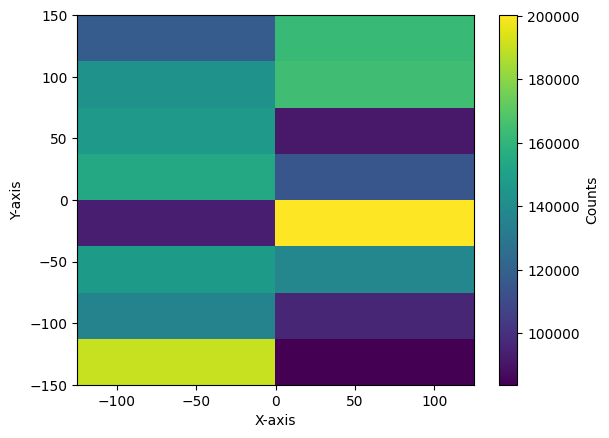

In [104]:
plt.imshow(total_histogram.T, origin='lower', aspect='auto', extent=[edges_x[0], edges_x[-1], edges_y[0], edges_y[-1]]) 
plt.colorbar(label='Counts') 
plt.xlabel('X-axis') 
plt.ylabel('Y-axis')

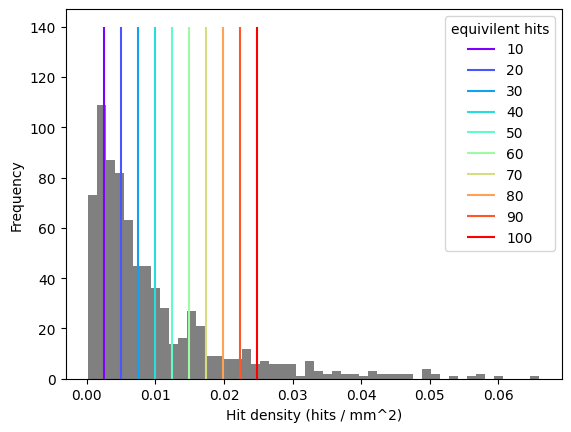

In [105]:
fig, ax = plt.subplots()
ax.hist(max_hits_in_module, 50, color='grey');
color = iter(cm.rainbow(np.linspace(0, 1, 10)))
for x in np.linspace(10, 100, 10):
    ax.vlines( x / 63.56**2, ymin=0, ymax=140, color=next(color), label=round(x))
ax.legend(title="equivilent hits");
ax.set_xlabel("Hit density (hits / mm^2)")
ax.set_ylabel("Frequency");